# <center>Laboratorium 3<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

Biblioteki niezbędne do wykonania zadania:

(instalacja: "pip install numpy scipy matplotlib memory_profiler")

In [3]:
import main

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt  

%load_ext memory_profiler

ModuleNotFoundError: No module named 'memory_profiler'

***Materiały przygotowujące:***
- Standard IEEE 754 [PL](https://pl.wikipedia.org/wiki/IEEE_754) [EN](https://en.wikipedia.org/wiki/IEEE_754)
- Liczba zmiennoprzecinkowa [PL](https://pl.wikipedia.org/wiki/Liczba_zmiennoprzecinkowa) [EN](https://en.wikipedia.org/wiki/Floating-point_arithmetic)
- Arytmetyka zmiennoprzecinkowa [Python](https://docs.python.org/3.7/tutorial/floatingpoint.html)

***Profilowanie kodu:***
- [timeit](https://docs.python.org/2/library/timeit.html) - profilowanie czasu wykonywania kodu 
- [memit](https://pypi.org/project/memory-profiler/) - profilowanie pamięci zużywanej przez kod

Zarówno timeit jak i memit wspierają magic command w Jupyter notebook, co obrazuje poniższy przykład:

In [ ]:
def func(size):
    a = np.random.random((size,size))
    b = np.random.random((size,size))
    c = a + b
    return c

for size in [100, 1000, 10000]:
    print('SIZE: ', size)
    print('Timing: ')
    saved_timing = %timeit -r 5 -n 10 -o func(size)
    saved_timing.average   # średni czas próby
    saved_timing.stdev     # odchylenie standardowe
    print('Memory usage: ')
    %memit func(size)
    print('\n')

***Zadanie 1.***  
Zaimplementuj funkcje obliczające błąd względny i bezwzględny (*relative_error* i *absolut_error*).
Funkcje przyjmują 2 argumenty: wartość dokładną oraz wartość przybliżoną, zwracając wartość błędu.
Implementacja powinna obsługiwać zarówno wartości skalarne, listy oraz wektory i macierze typu np.array z zachowaniem zasad [broadcastingu](https://numpy.org/doc/stable/user/basics.broadcasting.html).

**Wskazówka** Wykorzystuj funkcje *relative_error* i *absolut_error* w dalszej części laboratorium do analizy błędów.

***Zadanie 2.***  
Zaimplementuj funkcje *p_diff*, która przyjmuje jako parametry wartości całkowite $n$ i rzeczywiste $c$ oraz zwraca różnicę (co do wartości bezwzględnej)   dwóch wyrażeń $P_1$ oraz $P_2$:  
  
a) $P_1 = b - b + c $  
b) $P_2 = b + c - b $  
  
gdzie $b = 2^n$

Analizując różnicę w otrzymanych wynikach zastosuj warotści:  
- $n \in \{1,2,3... 50\}$
- $c \in \{0.1, 0.125, 0.25, 0.33, 0.5, 0.6\}$
 
Następnie odpowiedź i zilustruj wykresami pytania:

1. Jaki wynik powinniśmy otrzymać?
2. Które z liczb mają skończoną a które nieskończoną reprezentację?    
3. Dlaczego wyniki się od siebie różnią?    
4. Jaki typ błędu tutaj występuje?
5. Czy istnieje możliwość poprawy działania tych wyrażeń, jeżeli tak to w jaki sposób?  


In [9]:

c = [0.1, 0.125, 0.25, 0.33, 0.5, 0.6]

for n in range(len(c)):
    print(f"Dla n={n} and c={c}")
    print(f"results is {main.p_diff(n,c[n])}")          

Dla n=0 and c=[0.1, 0.125, 0.25, 0.33, 0.5, 0.6]
results is 8.326672684688674e-17
Dla n=1 and c=[0.1, 0.125, 0.25, 0.33, 0.5, 0.6]
results is 0.0
Dla n=2 and c=[0.1, 0.125, 0.25, 0.33, 0.5, 0.6]
results is 0.0
Dla n=3 and c=[0.1, 0.125, 0.25, 0.33, 0.5, 0.6]
results is 5.551115123125783e-17
Dla n=4 and c=[0.1, 0.125, 0.25, 0.33, 0.5, 0.6]
results is 0.0
Dla n=5 and c=[0.1, 0.125, 0.25, 0.33, 0.5, 0.6]
results is 1.4432899320127035e-15


1.Wyniki jakie powinniśmy otrzymać to zera, ale w trzech przypadkach wyszły liczby w okolicach zera, wynika to z błędów zaokrąglenia   
2.Nieskończoną reprezentację mają liczby 0.1,0.33,0.6 reszta liczb ma skończoną reprezentację  
3.Wyniki są różne ponieważ zapis każdej z liczb dysponuje ograniczoną ilością bitów możliwych do wykorzystywania w celu zapamiętania określonej liczby.  
4.Mamy tutaj do czynienia z błędem reprezentacji, powstają one gdy występuje konieczność reprezentacji liczby w maszynie z wykorzystaniem skończonej długości słów binarnych, co wymusza zaokrąglenie  
5.Istnieje możliwość poprawy działania tych wyrażeń, wystarczy zwiększyć ilość bitów przeznaczonych na zapis liczby  

***Zadanie 3.***  
Wartości funkcji $\mathrm{e}^{x}$ można obliczyć w przybliżeniu z szeregu Taylora w następujący sposób:  
  
$\mathrm{e}^{x} \approx \sum\limits_{i=0}^{N}{\cfrac{1}{i!}x^{i}}$ 
  
na podstawie przedstawionych informacji zaimplementuj funkcje *exponential* która oblicza $\mathrm{e}^{x}$ z zadaną dokładnością $N$. Porównaj działanie utworzonej funkcji z [numpy.exp](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.exp.html). Odpowiedz na pytania:  

1. Jaki typ błędu obrazuje omawiany przykład?
2. Dokonaj analizy błędów bezwzględnych i względnych w zależności od wartości $n$.

Dla n = 1, e = 1.0,blad bezwgledny: 1.7182818285, blad wzgledny:0.6321205588

Dla n = 2, e = 2.0,blad bezwgledny: 0.7182818285, blad wzgledny:0.2642411177

Dla n = 3, e = 2.5,blad bezwgledny: 0.2182818285, blad wzgledny:0.0803013971

Dla n = 4, e = 2.6666666666666665,blad bezwgledny: 0.0516151618, blad wzgledny:0.0189881569

Dla n = 5, e = 2.708333333333333,blad bezwgledny: 0.0099484951, blad wzgledny:0.0036598468

Dla n = 6, e = 2.7166666666666663,blad bezwgledny: 0.0016151618, blad wzgledny:0.0005941848

Dla n = 7, e = 2.7180555555555554,blad bezwgledny: 0.0002262729, blad wzgledny:0.0000832411

Dla n = 8, e = 2.7182539682539684,blad bezwgledny: 0.0000278602, blad wzgledny:0.0000102492

Dla n = 9, e = 2.71827876984127,blad bezwgledny: 0.0000030586, blad wzgledny:0.0000011252

Dla n = 10, e = 2.7182815255731922,blad bezwgledny: 0.0000003029, blad wzgledny:0.0000001114



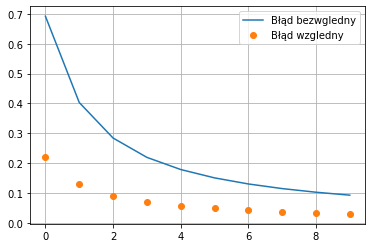

In [20]:

absolut_error = np.zeros(10)
relative_error = np.zeros(10)

for n in range(10):
    absolut_error[n] =main.absolut_error(np.pi,main.pi(n+1))
    relative_error[n] = main.relative_error(np.pi,main.pi(n+1))
    print(f"Dla n = {n+1}, e = {main.exponential(1,n+1)},blad bezwgledny: {main.absolut_error(np.exp(1),main.exponential(1,n+1)):.10f}, blad wzgledny:{main.relative_error (np.exp(1),main.exponential(1,n+1)):.10f}\n")

plt.plot(absolut_error)
plt.plot(relative_error, "o")
plt.legend(["Błąd bezwgledny","Błąd wzgledny"])
plt.grid()
plt.show()

1.Mamy tutaj do czynienia z błędem obcięcia. Często związany z przybliżeniem obliczeń nieskończonych, gdy występuje konieczność pominięcia najmniej istotnych wyrazów wyrażenia.  
2.Waraz ze wzrostem dokładności obie wartości zaczynają maleć, a dla n=10 błąd bezwzględny i błąd względny jest bardzo mały.

***Zadania 4.***  
Zaimplementuj 2 funkcje $coskx1$ i $coskx2$, realizujące rekurencyjnie przybliżanie wartości $cos(kx)$ w następujący sposób:

- Metoda 1:         
$cos(m+1)x = 2cosx \cdot cos(mx) - cos(m-1)x$
- Metoda 2:     
$cos(mx) = cosx \cdot cos(m-1)x - sinx \cdot sin(m-1)x$       
$sin(mx) = sinx \cdot cos(m-1)x + cosx \cdot sin(m-1)x$

Następnie przeanalizuj otrzymane rezultaty dla różnych $k$.

**Wskazówka** Do wyliczenia wartości $sin(x)$, $cos(x)$ (dla $k=1$) można użyć funkcji biblioteki numpy. 
Pozostałe wartości dla $k>1$ należy wyznaczyć rekurencyjnie.

In [ ]:
print("metoda pierwsza dla funkcji coskx1\n")
print("wynik dla cos(pi) to -1\n")
print(f"x1=pi/4, k ={4}, cos(pi)={main.coskx1(4,np.pi/4)}\n")
print("wynik dla cos(pi/2) wynosić -1\n")
print(f"x1=pi/4, k = {2}, cos(pi/2)={main.coskx1(2,np.pi/4)}\n")

print("metoda druga dla funkcji coskx2 oraz sinkx2\n")
print("wynik dla cos(pi) to -1, a dla sin(pi) to 0\n")
print(f"x = pi/4, k = {4}, cos(pi) = {main.coskx2(4, np.pi/4)[0]}, sin(pi) = {main.coskx2(4, np.pi/4)[1]} \n")
print("wynik dla cos(pi/2) to 0, a dla sin(pi/2) to 1\n")
print(f"x = pi/4, k = {2}, cos(pi/2) = {main.coskx2(2, np.pi/4)[0]}, sin(pi/2) = {main.coskx2(2, np.pi/4)[1]} \n")





***Zadanie 5.***  
Wiedząc, że
$\begin{aligned}
\sum_{n=1}^{\infty} \cfrac{1}{n^2} = \cfrac{1}{6} \pi^2
\end{aligned}$,
napisz kod w Pythonie (funkcja *pi*) obliczający przybliżenie liczby pi (nie korzystaj ze stałych <i>numpy.pi</i>, <i>math.pi</i> itp.). 

1. Z jakimi rodzajami błędów numerycznych mamy tu do czynienia? 
2. Sporządź wykresy błędów bezwzględnych i względnych w stosunku do stałej numpy.pi w zależności od wartości $n$.  

**Wskazówka** Do wizualizacji wyników użyj skali logarytmicznej.

Dla n= 1 pi =  2.449489742783178 bład bezwzgledny wynosi: 0.6921029108066152 a wzgledny 0.22030319876632393
Dla n= 2 pi =  2.7386127875258306 bład bezwzgledny wynosi: 0.4029798660639625 a wzgledny 0.12827247530117913
Dla n= 3 pi =  2.8577380332470415 bład bezwzgledny wynosi: 0.28385462034275166 a wzgledny 0.0903537318940444
Dla n= 4 pi =  2.9226129861250305 bład bezwzgledny wynosi: 0.2189796674647626 a wzgledny 0.06970339302727292
Dla n= 5 pi =  2.9633877010385707 bład bezwzgledny wynosi: 0.17820495255122237 a wzgledny 0.05672439816396741
Dla n= 6 pi =  2.9913764947484185 bład bezwzgledny wynosi: 0.15021615884137463 a wzgledny 0.04781528842376418
Dla n= 7 pi =  3.011773947846214 bład bezwzgledny wynosi: 0.1298187057435789 a wzgledny 0.04132257744976561
Dla n= 8 pi =  3.027297856657843 bład bezwzgledny wynosi: 0.11429479693195033 a wzgledny 0.03638116380280858
Dla n= 9 pi =  3.0395075895610533 bład bezwzgledny wynosi: 0.10208506402873985 a wzgledny 0.03249468511205317
Dla n= 10 pi =  3.

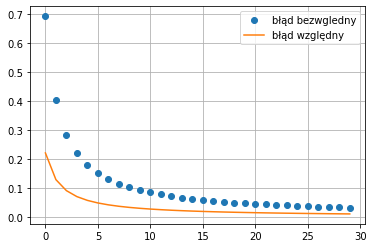

In [25]:
wzgl = []
bez = []
for n in range(30):
    bez.append(main.absolut_error(np.pi,main.pi(n+1)))
    wzgl.append(main.relative_error(np.pi,main.pi(n+1)))
    print("Dla n=",n+1,"pi = ",main.pi(n+1),"bład bezwzgledny wynosi:",bez[n],"a wzgledny",wzgl[n])
    
plt.plot(bez,"o")
plt.plot(wzgl,"-")
plt.legend(["błąd bezwgledny","błąd względny"])
plt.grid()
plt.show()

1.Błędy występujące w tym przykładzie to błędy obcięcia (suma nieskończonego ciągu nie jest możliwa do obliczenia w sposób numeryczny) oraz błędy zaokrągleń im większa wartość parametru n, tym mniejsze kolejne wyrazy ciągu 1/(n^2) reprezentacji  
2.Dla małych wartości n błąd bezwględny i względny jest duży, wraz ze wzrostem obie wartości maleją.  

***Zadanie 6.***  
Używając funkcji timeit oraz memit zbadaj czas działania oraz zużycie pamięci funkcji z Zadania 4 w zalożności od różnych wartości $n$.     
Sporządź wykresy:
- czasu obliczenia danego przybliżenia liczby pi w zależności od $n$. 
W tym celu wykorzystaj funkcje [errorbar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) oraz zwracane przez *timeit* wartości średnie oraz ich odchylenie standardowe. 
- błędu bezwzględnego przybliżenia liczby pi od czasu jego wykonania.



**Wskazówka** Użyj opcji -o (output) dla *timeit* aby zapisać wynik do zmiennej. Opcje -r (runs) i -n (ilość pentli) decydują o ilości wykonanych prób.     
Do wizualizacji wyników użyj skali logarytmicznej.

520 ns ± 170 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
6.67 µs ± 645 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
4.71 µs ± 1.26 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
7.67 µs ± 981 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
9.04 µs ± 614 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
9.31 µs ± 969 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
10.7 µs ± 816 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
10.6 µs ± 1.03 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
11.5 µs ± 986 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
12.4 µs ± 1.03 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
13.1 µs ± 1.14 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
13.3 µs ± 1.09 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
14.4 µs ± 1 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
16.6 µs ± 3.36 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
15.7 µs ± 927 ns 

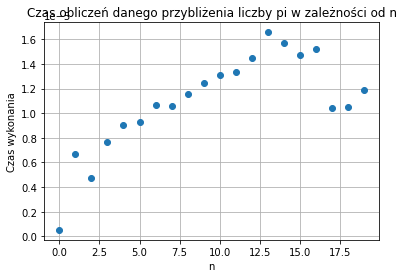

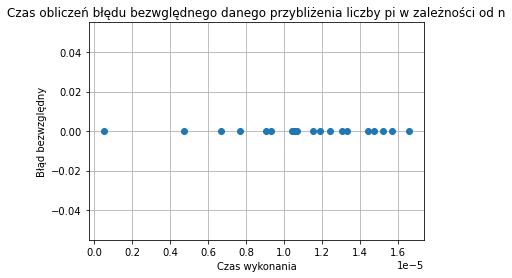

In [8]:
x = np.arange(0,20,1)
time = np.zeros(20)
deviation = np.zeros(20)
error = np.zeros(20)


for n in range(20):
    saved_timing = %timeit -r 5 -n 10 -o main.pi(n)
    time[n] = saved_timing.average #średnia
    dev[n] =saved_timing.stdev #odchylenie standardowe
    err[n] = main.absolut_error(main.pi(n), np.pi)


plt.errorbar(x, time, yerr=deviation, ls="none", marker="o")
plt.title("Czas obliczeń danego przybliżenia liczby pi w zależności od n")
plt.xlabel("n")
plt.ylabel("Czas wykonania")
plt.grid()
plt.show()

plt.plot(time, error, "o")
plt.title("Czas obliczeń błędu bezwględnego danego przybliżenia liczby pi w zależności od n")
plt.xlabel("Czas wykonania")
plt.ylabel("Błąd bezwzględny")
plt.grid()
plt.show()

#Wnioski  
1.Zapoznanie się z nową składnią funkcji print(f"Input directory:{args.input}") oraz print(f"Output directory:{args.output_directory}"),formatuja one łańcuchy znaków.Wyrażenia w klamrach są to zmienne.  
2.Przećwiczenie biblioteki numpy do wykonywania obliczeń numerycznych oraz biblioteki matplotlib m.in. przez wyrysowywanie wykresów w celu zobrazowania błędu względnego i bezwględnego. Głównie mogliśmy zaobserwować, iż wraz ze wzrotem parametru n powyższe wartości zmniejszały się.  
3.Największą trudność sprawiła mi trudność zaimplementowania błędu bezwzględnego, w którym trzeba było uwzględnić wartości skalarne, liczy oraz wektory dla wartości dokładnej i wartości przybliżonej.  
4.Dzięki powyższej implementacji zapoznałem się z funkcją all(),zip() oraz any(),dzięki którym mogłem rozwiązać dany problem.  
5.Zapoznanie się podstawowymi błędami numerycznymi, które można podzielić na cztery podstawowe kategorie: błędy danych wejściowych, błędy reprezentacji, błędy obcięcia, błędy zaokrągleń
6.Bardzo spodobała mi się implementacja kodu obliczającego przybliżenie liczby pi oraz implementacja funkcji exponential która oblicza e^x z zadaną dokładnością 𝑁.
7.W ostatnim zadaniu miałem możliwość zapoznać się z funkcją timeit oraz memit, która posłużyła do zbadania czasu działania oraz zużycia pamięci funkcji realizującej rekurencyjne przybliżanie wartości cos(kx) dwoma metodami.

